<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Making Questions</div>

## Import libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

## Read cleaned data from file

In [2]:
cleaned_df = pd.read_csv('data_footballer_processed.csv')
cleaned_df.head(10)

,Name,Height,Weight,Preferred Foot,Birth Date,Age,Nation,Club,League,Preferred Positions,...,POT,Value,Wage,Ball Skills,Defence,Mental,Passing,Physical,Shooting,Goalkeeper
0,Erling Haaland,195,94,Left,2000-07-21,23,Norway,Manchester City,England Premier League (1),ST,...,94,157000000.0,340000.0,80.5,38.0,80.2,59.0,83.7,84.0,10.4
1,Kylian Mbappé,182,75,Right,1998-12-20,24,France,Paris Saint-Germain,France Ligue 1 (1),"ST, LW",...,94,153500000.0,225000.0,92.5,33.0,76.7,78.3,89.0,82.2,8.4
2,Kevin De Bruyne,181,75,Right,1991-06-28,32,Belgium,Manchester City,England Premier League (1),"CM, CAM",...,91,103000000.0,350000.0,89.0,61.5,84.0,94.3,75.7,83.1,11.2
3,Harry Kane,188,85,Right,1993-07-28,30,England,Bayern München,Germany 1. Bundesliga (1),ST,...,90,119500000.0,170000.0,84.5,42.0,81.3,85.0,75.9,86.5,10.8
4,Thibaut Courtois,199,96,Left,1992-05-11,31,Belgium,Real Madrid,Spain Primera Division (1),GK,...,90,63000000.0,250000.0,18.0,17.0,41.5,27.3,54.0,22.4,86.6
5,Robert Lewandowski,185,81,Right,1988-08-21,35,Poland,FC Barcelona,Spain Primera Division (1),ST,...,90,58000000.0,340000.0,88.0,30.5,81.0,76.7,81.1,87.8,10.2
6,Karim Benzema,185,81,Right,1987-12-19,35,France,Al Ittihad,Saudi Pro League (1),"CF, ST",...,90,51000000.0,95000.0,89.0,21.0,77.7,80.0,79.3,84.6,8.2
7,Lionel Messi,169,67,Left,1987-06-24,36,Argentina,Inter Miami,USA Major League Soccer (1),"CF, CAM",...,90,41000000.0,23000.0,94.5,29.5,75.2,88.0,79.4,83.6,10.8
8,Rúben Dias,187,82,Right,1997-05-14,26,Portugal,Manchester City,England Premier League (1),CB,...,90,97500000.0,250000.0,69.5,89.0,73.2,71.0,70.1,48.4,9.4
9,Vini Jr.,176,73,Right,2000-07-12,23,Brazil,Real Madrid,Spain Primera Division (1),LW,...,94,121500000.0,310000.0,91.0,21.5,69.5,78.3,84.3,71.4,7.2


In [3]:
cleaned_df.shape

(10020, 21)

In [4]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10020 entries, 0 to 10019
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 10020 non-null  object 
 1   Height               10020 non-null  int64  
 2   Weight               10020 non-null  int64  
 3   Preferred Foot       10020 non-null  object 
 4   Birth Date           10020 non-null  object 
 5   Age                  10020 non-null  int64  
 6   Nation               10020 non-null  object 
 7   Club                 10020 non-null  object 
 8   League               10020 non-null  object 
 9   Preferred Positions  10020 non-null  object 
 10  OVR                  10020 non-null  int64  
 11  POT                  10020 non-null  int64  
 12  Value                10020 non-null  float64
 13  Wage                 10020 non-null  float64
 14  Ball Skills          10020 non-null  float64
 15  Defence              10020 non-null 

## Data Preprocessing

- One-hot encoding is a process used in data preprocessing to convert categorical variables into a binary matrix (0s and 1s). It is particularly useful when dealing with machine learning algorithms that require numerical input, as these algorithms often work with numerical data rather than categorical data.
- To handle easily in grouping football player's position, I create one-hot encoding for position column so save in one_hot_position_df.

In [5]:
position_df = cleaned_df['Preferred Positions']
one_hot_position_df = position_df.str.get_dummies(', ')
# Custom order from GK -> ST to observe
custom_order = ['GK', 'LWB', 'LB', 'CB', 'RB', 'RWB', 'CDM', 'CM', 'LM', 'RM', 'CAM', 'LW', 'RW', 'CF', 'ST']
one_hot_position_df = one_hot_position_df[custom_order]
one_hot_position_df

,GK,LWB,LB,CB,RB,RWB,CDM,CM,LM,RM,CAM,LW,RW,CF,ST
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10016,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
10017,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
10018,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Question 1: How do various factors influence the transfer value of players in the dataset?

### Benefits of Seeking Answers:
- Clubs and football managers can use insights gained from the analysis to strategically recruit players based on factors that contribute positively to transfer values. Understanding which attributes are highly valued in the market allows for informed decision-making during player acquisition.
- Youth academies and player development programs can tailor their strategies to emphasize the development of attributes that have a positive impact on transfer values. This could lead to the grooming of players with characteristics highly sought after in the market.
- Clubs and agents can use the knowledge gained to negotiate better contracts for players. Understanding the factors that influence transfer values enables more effective contract negotiations, potentially resulting in favorable terms for both players and clubs.
- The analysis can contribute to a better understanding of market trends and dynamics in the football transfer market. Clubs can anticipate shifts in demand for certain player attributes and adjust their strategies accordingly.
- Football clubs can use the insights to plan their finances more effectively. Understanding the factors influencing transfer values allows clubs to allocate resources efficiently and make well-informed decisions about player investments.

### Answer by using dataset:

#### 1.1 Correlation between Overall Rating (OVR) and Value

- OVR is a numerical representation of a player's overall skill and performance level in the game. The Overall Rating is typically a single number that summarizes various attributes and abilities of a player, including technical skills, physical attributes, and mental attributes.
- So, good player also has high OVR

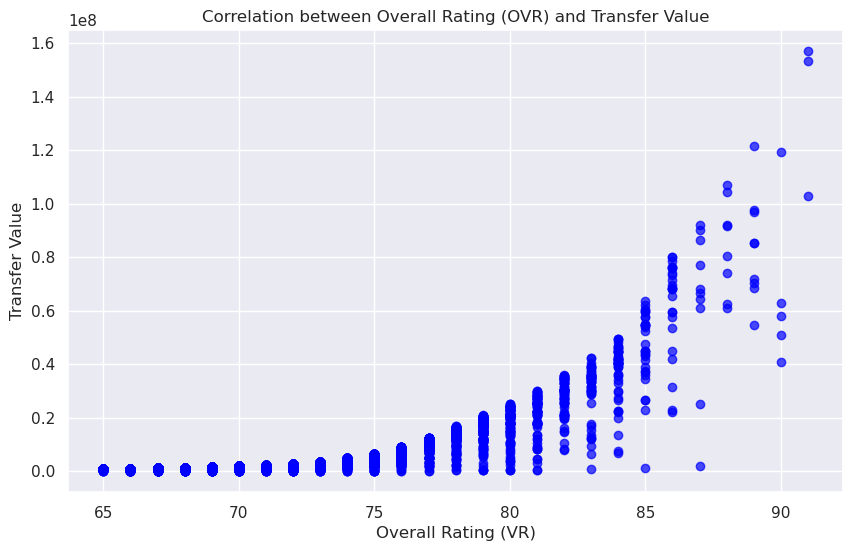

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['OVR'], cleaned_df['Value'], alpha=0.7, color='blue')
plt.title('Correlation between Overall Rating (OVR) and Transfer Value')
plt.xlabel('Overall Rating (VR)')
plt.ylabel('Transfer Value')
plt.show()

- By observing the plot, we can see a positive correlation between a player's OVR and their transfer value is a common trend, player who has high OVR almost has high Value.
- The OVR serves as a useful predictor or indicator of a player's potential market value. Clubs and gamers often use the OVR as a quick reference to assess a player's overall quality and effectiveness on the field.
- But there are players that have high OVR but have low price.
- However, it's crucial to note that while OVR is a valuable metric, it doesn't capture all the nuances that can influence a player's market value in real-world football. Factors such as age, playing position, ... also play significant roles in determining transfer values.

#### 1.2 At what age do players have the highest value?

- Get count of each age in top 100 most valuable football players

In [7]:
top_100_transfer_value_df = cleaned_df.sort_values(by='Value', ascending=False).head(100)
age_count_df = top_100_transfer_value_df.groupby('Age')['Name'].count()
age_count_df

Age
20     3
21     1
22     5
23     7
24    12
25     6
26    14
27     7
28     8
29    11
30     9
31     8
32     5
33     2
35     2
Name: Name, dtype: int64

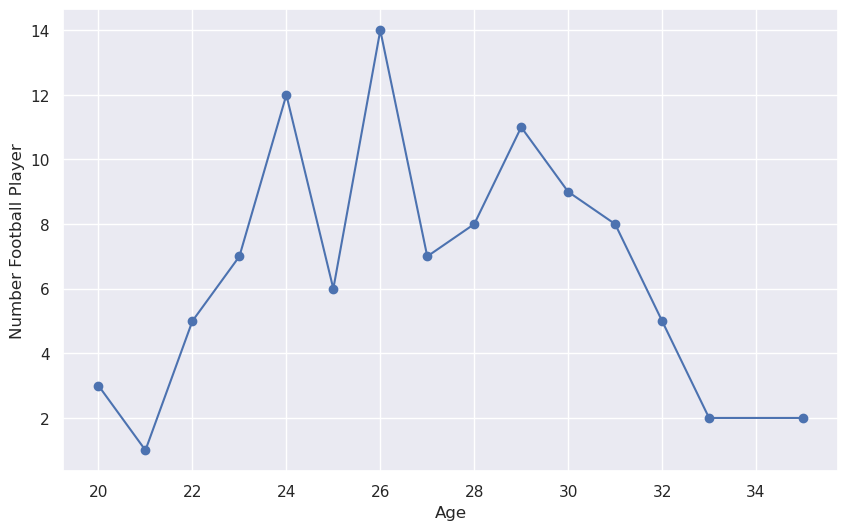

In [15]:
plt.figure(figsize=(10, 6))
age_count_df.plot.line(ylabel = 'Number Football Player', xlabel = 'Age', marker='o')
plt.show()

- As we can see, age 26 has most valuable player, so that in that age player have the best form in career
- From age 24 to age 26, player's value higher than others. 

#### 1.3 Which position has the highest mean value player?

- Create dataframe contain postitions and mean value of each position

In [9]:
values_by_positions_df = one_hot_position_df.merge(cleaned_df['Value'],left_index=True, right_index=True)
mean_value_by_pos = {}
for col in values_by_positions_df.columns[:-1]:
    num = 0
    value = 0
    for i in range(len(values_by_positions_df[col])):
        if values_by_positions_df[col][i]:
            num += 1
            value += values_by_positions_df['Value'][i]
    mean_value_by_pos[col] = value / num
mean_value_df = pd.DataFrame(list(mean_value_by_pos.items()), columns=['Position', 'Mean Value'])
mean_value_df

,Position,Mean Value
0,GK,3.005909e+06
1,LWB,3.110470e+06
2,LB,3.122875e+06
3,CB,3.253864e+06
4,RB,3.268388e+06
5,RWB,2.848129e+06
6,CDM,3.882246e+06
7,CM,4.344462e+06
8,LM,3.829675e+06
9,RM,3.540410e+06


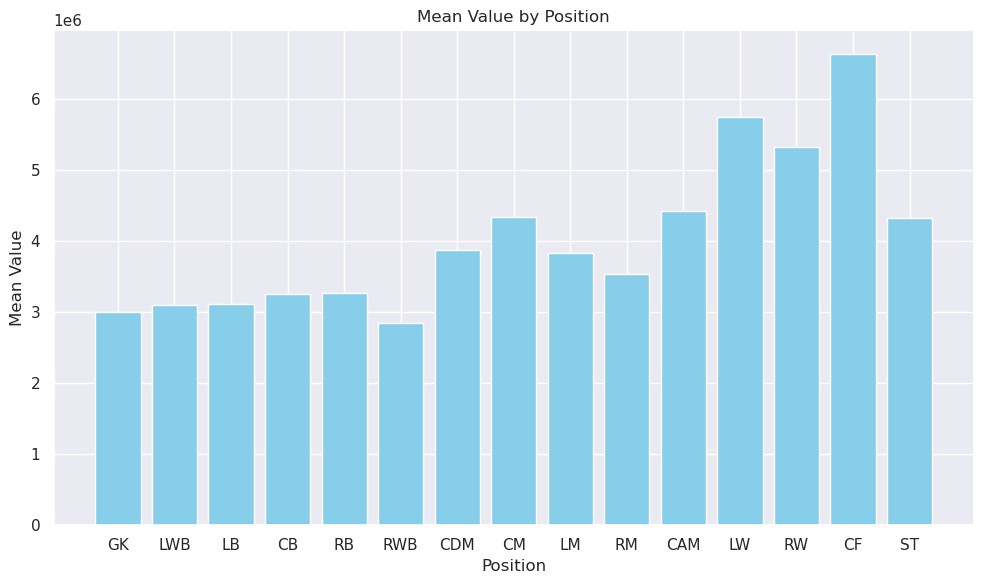

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(mean_value_df['Position'], mean_value_df['Mean Value'], color='skyblue')
plt.xlabel('Position')
plt.ylabel('Mean Value')
plt.title('Mean Value by Position')
plt.tight_layout()
plt.show()

- There is a dramatical difference between attacking players and defensive players.

**Conclusion**:
- Players that have OVR high that have high value.
- Players in career advancement age that have high value.
- Players who play for attacking have higher value than that play for defensive.

## Question 2: How do age and traning quality impact players's growth?

### Benefits of Seeking Answers:
- Coaches can tailor training programs based on an understanding of how age and training quality interact to influence a player's growth.
- Clubs and academies can implement more effective player development programs by considering the impact of age and training quality on growth.
- Understanding the relationship between age and training quality helps in optimizing training approaches, ensuring they align with the developmental needs of players at different stages.
- Clubs can refine their talent identification processes by considering the influence of age and training quality on a player's potential for growth.

### Answer by using dataset:

- Create column 'Growth', "POT" typically stands for "Potential" in the context of sports and player ratings, it is overall rating of player in the future, "OVR" is overall rating of player now. So I get the Growth ratings by POT minus OVR
- Create growth player DataFrame

In [17]:
growth_players_df = cleaned_df[['Name', 'Age', 'Club', 'League' ,'Nation', 'OVR', 'POT']]
growth_players_df = growth_players_df.copy()
growth_players_df.loc[:, 'Growth'] = growth_players_df.apply(lambda row: row['POT'] - row['OVR'] , axis=1)
growth_players_df

,Name,Age,Club,League,Nation,OVR,POT,Growth
0,Erling Haaland,23,Manchester City,England Premier League (1),Norway,91,94,3
1,Kylian Mbappé,24,Paris Saint-Germain,France Ligue 1 (1),France,91,94,3
2,Kevin De Bruyne,32,Manchester City,England Premier League (1),Belgium,91,91,0
3,Harry Kane,30,Bayern München,Germany 1. Bundesliga (1),England,90,90,0
4,Thibaut Courtois,31,Real Madrid,Spain Primera Division (1),Belgium,90,90,0
...,...,...,...,...,...,...,...,...
10015,Tim Schreiber,21,1. FC Saarbrücken,Germany 3. Liga (3),Germany,65,75,10
10016,Calvin Ramsay,20,Preston North End,England Championship (2),Scotland,65,81,16
10017,Tomás Salazar,23,Águilas Doradas Rionegro,CONMEBOL Sudamericana,Colombia,65,74,9
10018,Arda Kızıldağ,25,Gaziantep FK,Turkey Super Lig (1),Turkey,65,72,7


#### 2.1 Correlation between Age and Growth?

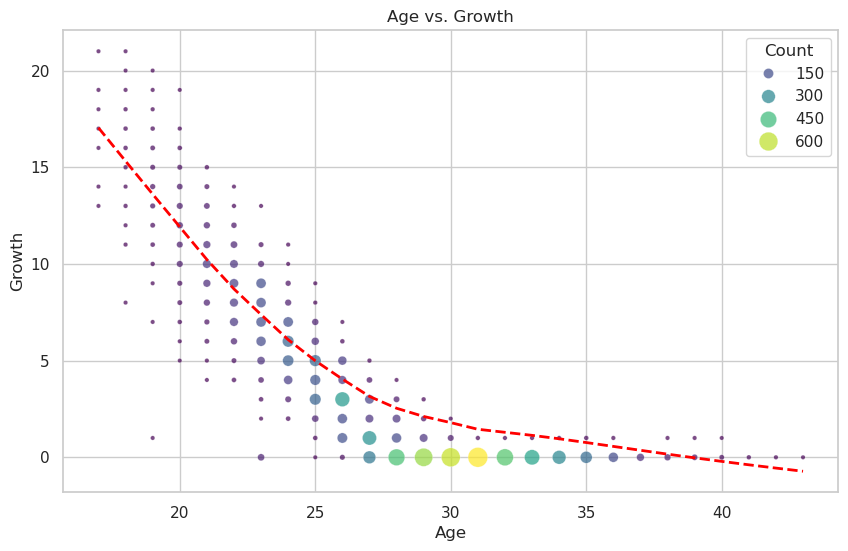

In [18]:
# Group the data by Age and Growth columns
grouped_AG = growth_players_df.groupby(['Age', 'Growth']).size().reset_index(name='count')

# Create a scatter plot with Seaborn
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.scatterplot(data=grouped_AG, x="Age", y="Growth", size="count", sizes=(10, 200), hue="count", palette="viridis", alpha=0.7)

# Add a trendline (lowess)
sns.regplot(data=grouped_AG, x="Age", y="Growth", scatter=False, color="red", lowess=True, line_kws={"linewidth": 2, "linestyle": "--"})

plt.title("Age vs. Growth")
plt.xlabel("Age")
plt.ylabel("Growth")
plt.legend(title="Count")
plt.show()

- By observing the plot, we can see a negative correlation between Age and Growth.
- The most significant concentration of larger dots is observed in the age range of approximately 28 to 32. The largest dot at the age of 30 with a Growth of 0 suggests that around this age, players typically reach their peak performance and are less likely to experience growth in their abilities. This age range is often considered the prime of a footballer's career.
- An intriguing observation is the absence of Growth after the age of 30. This further reinforces the notion that, in the world of professional football, players tend to reach a performance plateau after entering their thirties. Their physical abilities may start to decline, and they may focus more on maintaining their current skill levels rather than experiencing growth.

#### 2.2 How is important of traning quality to growth?

- Get top 1000 player who has the highest growth potential

In [21]:
growth_players_df.sort_values(by='Growth', ascending=False)
top_1000_growth_players_df = growth_players_df.sort_values(by='Growth', ascending=False).head(1000)
top_1000_growth_players_df

,Name,Age,Club,League,Nation,OVR,POT,Growth
9532,Noah Lahmadi,18,Toulouse FC,France Ligue 1 (1),France,65,86,21
8615,Julien Duranville,17,Borussia Dortmund,Germany 1. Bundesliga (1),Belgium,66,87,21
9742,Amourricho van Axel Dongen,19,Ajax,Holland Eredivisie (1),Netherlands,65,85,20
8577,Tom Bischof,18,TSG 1899 Hoffenheim,Germany 1. Bundesliga (1),Germany,66,86,20
8726,Leon King,19,Rangers,Scotland Premiership (1),Scotland,66,85,19
...,...,...,...,...,...,...,...,...
1875,Ian Maatsen,21,Chelsea,England Premier League (1),Netherlands,74,83,9
3586,Hrvoje Smolčić,23,Eintracht Frankfurt,Germany 1. Bundesliga (1),Croatia,71,80,9
3685,El Bilal Touré,22,Atalanta,Italy Serie A (1),Mali,71,80,9
8739,Luke Le Roux,23,FC Volendam,Holland Eredivisie (1),South Africa,66,75,9


- Top 5 league that has most players in top 100 growth players

In [28]:
league_count_df = top_1000_growth_players_df['League'].value_counts()
top_5_league_count_df = league_count_df.sort_values(ascending=False).head(5)
top_5_league_count_df

France Ligue 1 (1)            78
Spain Primera Division (1)    73
Holland Eredivisie (1)        63
England Premier League (1)    63
Italy Serie A (1)             62
Name: League, dtype: int64

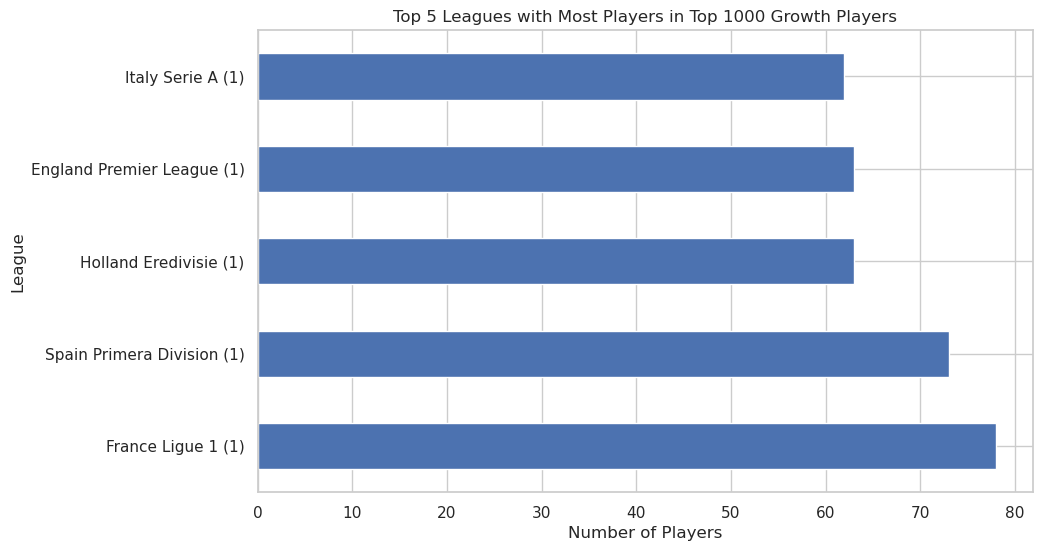

In [30]:
plt.figure(figsize=(10, 6))
top_5_league_count_df.plot(kind='barh')

plt.title('Top 5 Leagues with Most Players in Top 1000 Growth Players')
plt.xlabel('Number of Players')
plt.ylabel('League')
plt.show()

- We analyze player's nationality to see the which country has most growth player

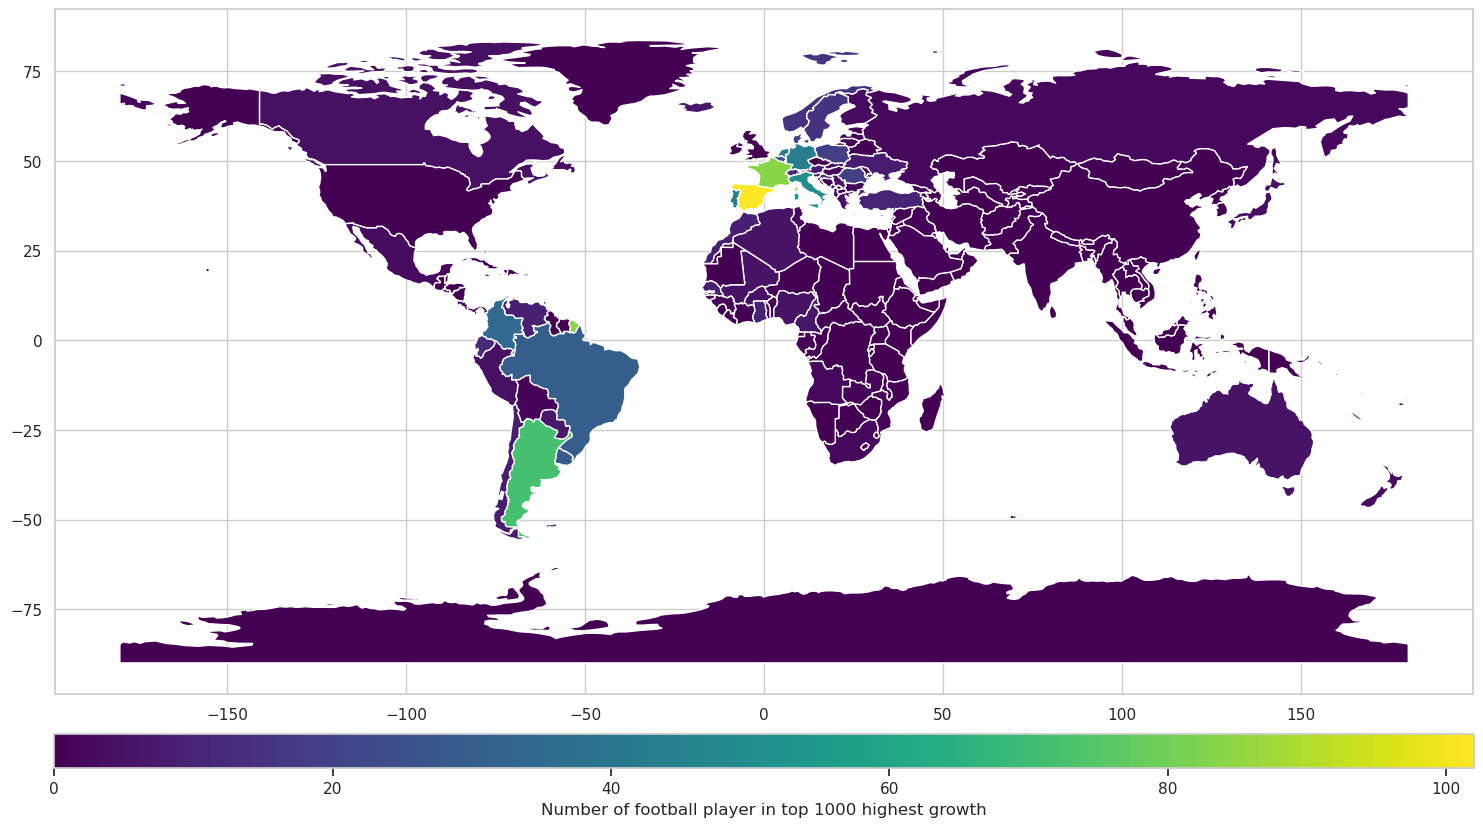

In [31]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
country_counts = top_1000_growth_players_df['Nation'].value_counts()
country_counts_df = country_counts.reset_index()
country_counts_df.columns = ['Country', 'Count']
merged_data = world.merge(country_counts_df, left_on='name', right_on='Country', how='left')

merged_data['Count'] = merged_data['Count'].fillna(0)

fig, ax = plt.subplots(figsize=(15, 10))

divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.4)

merged_data.plot(column='Count', cmap='viridis', legend=True, ax=ax, cax=cax,
                 legend_kwds={"label": "Number of football player in top 1000 highest growth", "orientation": "horizontal"})

plt.tight_layout()
plt.show()

- European and South American players have high potential.
- Spain and France League is league that young player can develope career.

**Conclusion**:
- Nationality and League are 2 factors that important to develope career for young talents.
- Some countries are known for having strong youth development systems. These systems focus on nurturing young talents from an early age, providing them with quality coaching, facilities, and structured pathways to professional football.
- The football culture in a country can influence a player's development. Nations with a strong footballing culture often prioritize skill development, tactical understanding, and a competitive spirit from a young age.
- It's well-known that Europe and South America are traditionally considered hotbeds for football talent. Many of the world's top players hail from these continents.
- Young players often need regular playing time to develop their skills and gain experience. Leagues that provide opportunities for young talents to feature in first-team matches contribute significantly to their development.
- The quality of coaching within a league is essential. Leagues with high coaching standards can provide young players with the guidance and instruction needed to improve technical, tactical, and mental aspects of their game.

## Question 3:

### Benefits of Seeking Answers:

## Question 4:

### Benefits of Seeking Answers:

## Question 5:

### Benefits of Seeking Answers: